# Подключаем библиотеки

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 0. ОПИСАНИЕ ЗАДАЧИ

Данный набор данных содержит информацию о клиентах банка и их поведенческих характеристиках. Данные включают демографические показатели, финансовые метрики и историю взаимодействий клиентов с банком.


**Задача:** предсказать отток клиентов (бинарная классификация) на основе их характеристик. Определять, уйдет ли клиент из банка (Attrited Customer) или останется (Existing Customer).


In [525]:
from google.colab import drive
import pandas as pd

# Монтируем Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [526]:
# Читаем файл
df = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')

In [527]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#Первичный анализ данных

In [528]:

print(f"Размерность данных: {df.shape[0]} строк, {df.shape[1]} столбцов")



Размерность данных: 10127 строк, 21 столбцов


# Основная информация о данных

In [529]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_


Таблица содержит 10127 записей о клиентах с 21 признаком, включая:
- 14 числовых признаков (возраст, кредитный лимит, количество транзакций и т.д.)
- 6 категориальных признаков (уровень образования, семейное положение, категория дохода и т.д.)
- 1 бинарную целевую переменную - статус клиента

# Статистика числовых признаков

In [530]:
print(df.head(10))

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue  

## Целевая переменная:
- **Attrition_Flag** - статус клиента: "Existing Customer" (действующий) / "Attrited Customer" (ушедший)

## Демографические признаки:
- **CLIENTNUM** - уникальный идентификатор клиента
- **Customer_Age** - возраст клиента в годах
- **Gender** - пол клиента
- **Education_Level** - уровень образования
- **Marital_Status** - семейное положение
- **Income_Category** - категория дохода

## Информация о банковских продуктах:
- **Card_Category** - категория кредитной карты
- **Months_on_book** - количество месяцев как клиент банка
- **Total_Relationship_Count** - количество продуктов банка у клиента
- **Credit_Limit** - кредитный лимит по карте
- **Total_Revolving_Bal** - сумма задолженности

## Активность и поведение:
- **Months_Inactive_12_mon** - количество неактивных месяцев за последние 12 месяцев
- **Contacts_Count_12_mon** - количество контактов с клиентом за 12 месяцев
- **Total_Trans_Amt** - общая сумма транзакций за 12 месяцев
- **Total_Trans_Ct** - общее количество транзакций за 12 месяцев
- **Avg_Open_To_Buy** - средняя доступная кредитная линия
- **Total_Amt_Chng_Q4_Q1** - изменение суммы транзакций (Q4 vs Q1)
- **Total_Ct_Chng_Q4_Q1** - изменение количества транзакций (Q4 vs Q1)
- **Avg_Utilization_Ratio** - средний коэффициент использования кредита

# Анализ целевой переменной

In [531]:
print(df['Attrition_Flag'].value_counts())
print(f"Доля ушедших клиентов: {(df['Attrition_Flag'] == 'Attrited Customer').mean():.2%}")

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Доля ушедших клиентов: 16.07%


# Статистика числовых признаков

In [532]:
print(df.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

# 1. ПОДГОТОВКА ДАННЫХ
Создаем копию данных

In [533]:

data = df.copy()



Удаляем столбец CLIENTNUM (уникальный идентификатор) чтобы модель училась на реальных закономерностях

In [534]:

data = data.drop('CLIENTNUM', axis=1)


Разделяем на признаки и целевую переменную

In [535]:
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

Кодируем целевую переменную: 1 - ушедший клиент, 0 - действующий клиент

In [536]:

y = y.map({'Existing Customer': 0, 'Attrited Customer': 1})
print(f"Признаки: {X.shape[1]}, Наблюдения: {X.shape[0]}")

Признаки: 19, Наблюдения: 10127


#2. РАЗБИЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ

In [537]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"\nРазделение данных:")
print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")
print(f"Доля ушедших клиентов в обучающей выборке: {y_train.mean():.2%}")


Разделение данных:
Обучающая выборка: 7088 samples
Тестовая выборка: 3039 samples
Доля ушедших клиентов в обучающей выборке: 16.07%


# 3. ВИЗУАЛИЗАЦИЯ ДАННЫХ

Создаём копию данных

In [538]:
viz_data = X_train.copy()
viz_data['Attrition_Flag'] = y_train

Распределение целевой переменной

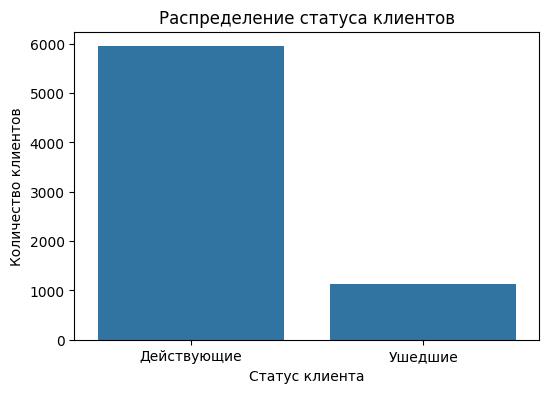

In [539]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=pd.DataFrame({'Attrition_Flag': y_train}))
plt.title('Распределение статуса клиентов')
plt.xlabel('Статус клиента')
plt.ylabel('Количество клиентов')
plt.xticks([0, 1], ['Действующие', 'Ушедшие'])
plt.show()

Наблюдается значительный дисбаланс классов - ушедших клиентов примерно в 6 раз меньше, чем действующих.



Матрица корреляций числовых признаков

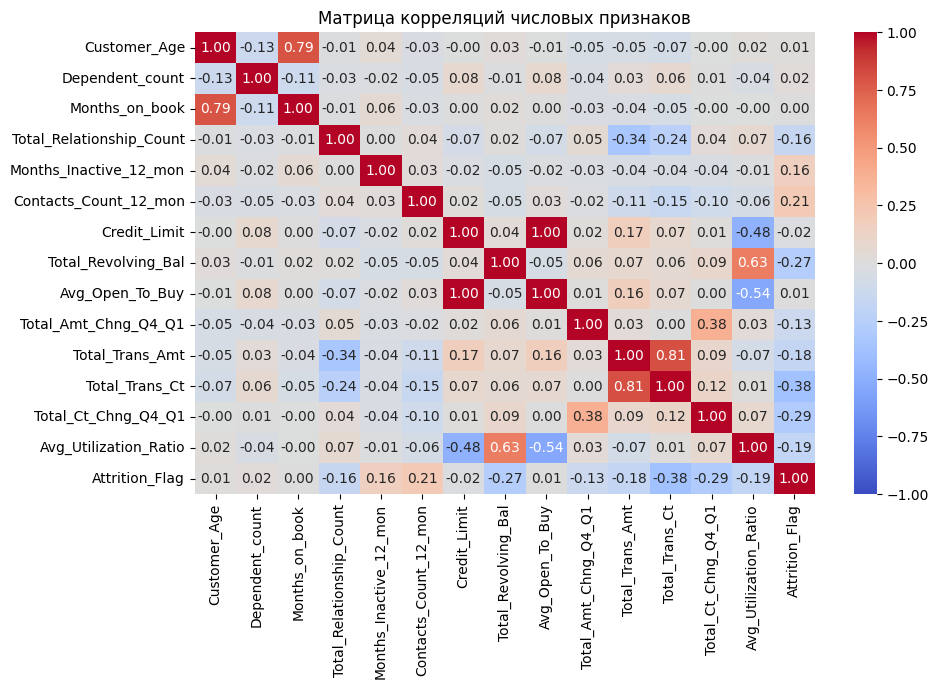

In [540]:
numeric_df = viz_data.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Матрица корреляций числовых признаков')
plt.show()

Можно заметить, что отток клиентов (Attrition_Flag) лучше всего коррелирует с количеством транзакций и коэффициентом использования кредита.

Анализ возраста клиентов

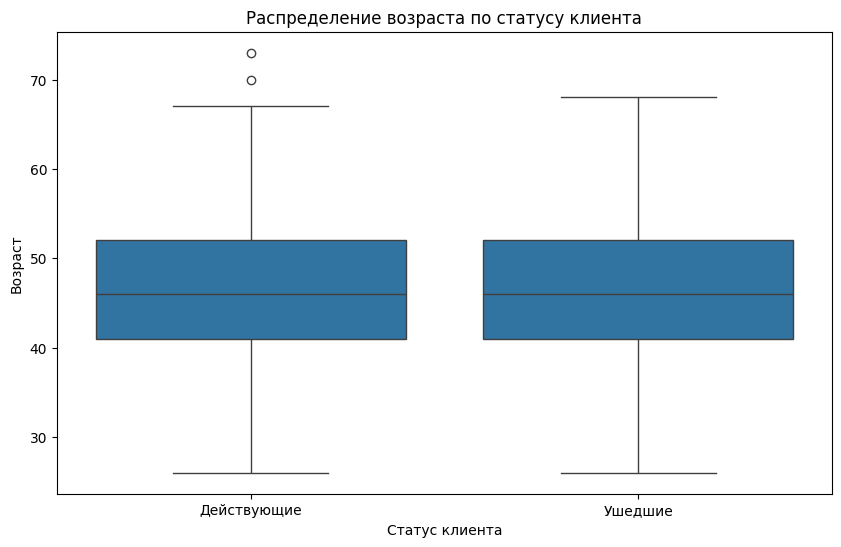

In [541]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=viz_data)
plt.title('Распределение возраста по статусу клиента')
plt.xlabel('Статус клиента')
plt.ylabel('Возраст')
plt.xticks([0, 1], ['Действующие', 'Ушедшие'])
plt.show()

Ушедшие клиенты в среднем немного старше действующих клиентов

Анализ кредитного лимита

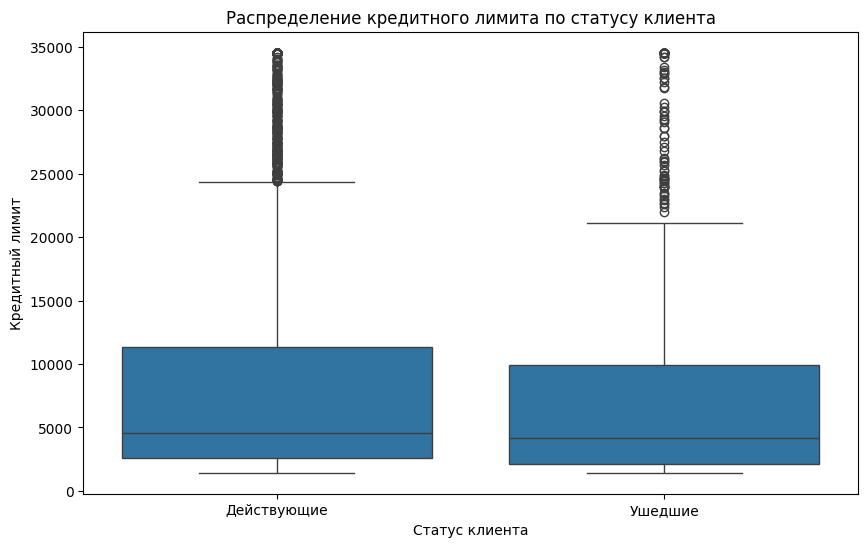

In [542]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=viz_data)
plt.title('Распределение кредитного лимита по статусу клиента')
plt.xlabel('Статус клиента')
plt.ylabel('Кредитный лимит')
plt.xticks([0, 1], ['Действующие', 'Ушедшие'])
plt.show()

У действующих клиентов в среднем выше кредитный лимит

 Анализ количества транзакций

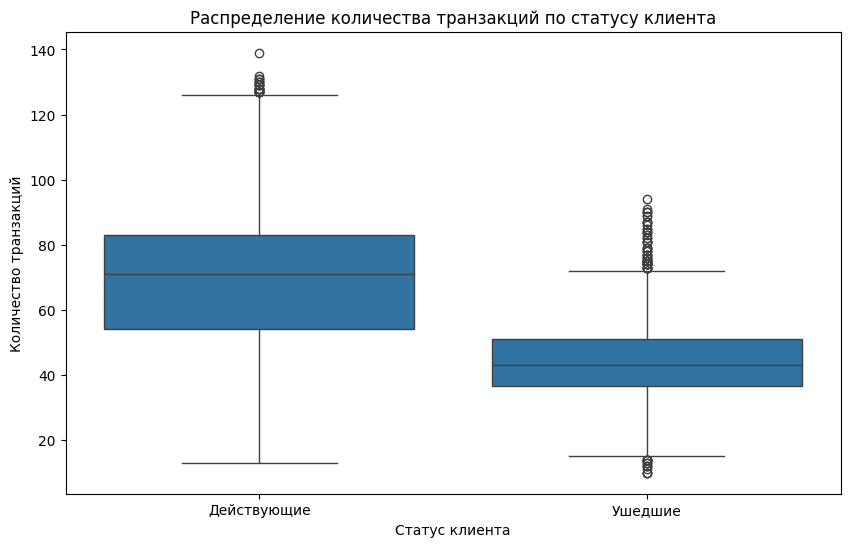

In [543]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=viz_data)
plt.title('Распределение количества транзакций по статусу клиента')
plt.xlabel('Статус клиента')
plt.ylabel('Количество транзакций')
plt.xticks([0, 1], ['Действующие', 'Ушедшие'])
plt.show()

Действующие клиенты совершают значительно больше транзакций.

Отток по уровню дохода

<Figure size 1000x600 with 0 Axes>

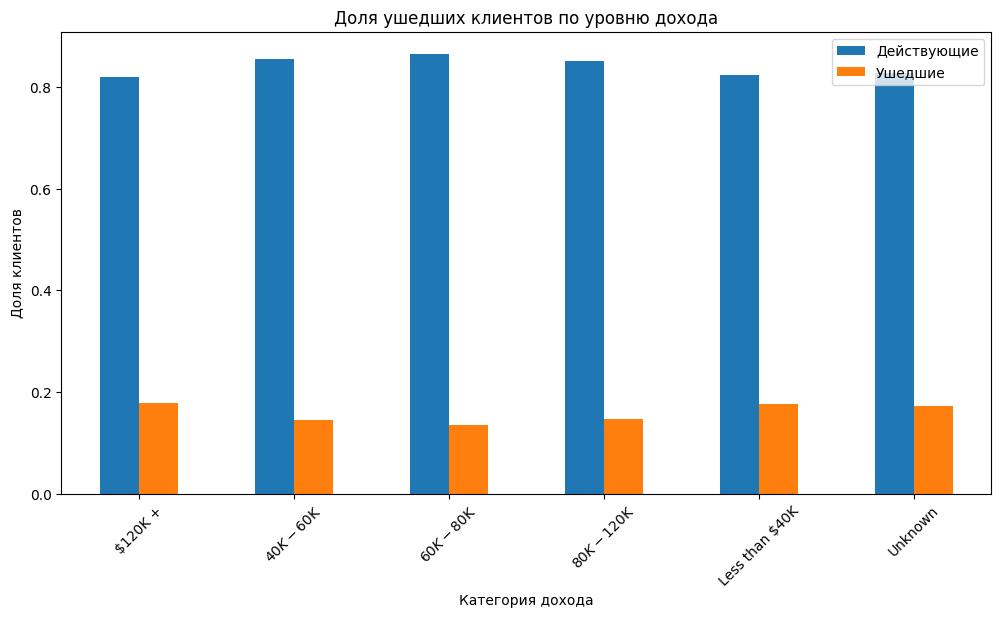

In [544]:
plt.figure(figsize=(10, 6))
income_attrition = pd.crosstab(viz_data['Income_Category'], viz_data['Attrition_Flag'])
income_attrition_percent = income_attrition.div(income_attrition.sum(axis=1), axis=0)
income_attrition_percent.plot(kind='bar', figsize=(12, 6))
plt.title('Доля ушедших клиентов по уровню дохода')
plt.xlabel('Категория дохода')
plt.ylabel('Доля клиентов')
plt.legend(['Действующие', 'Ушедшие'])
plt.xticks(rotation=45)
plt.show()

Видим что клиенты с низким доходом имеют наибольшую долю оттока

Отток по категории карты

<Figure size 1000x600 with 0 Axes>

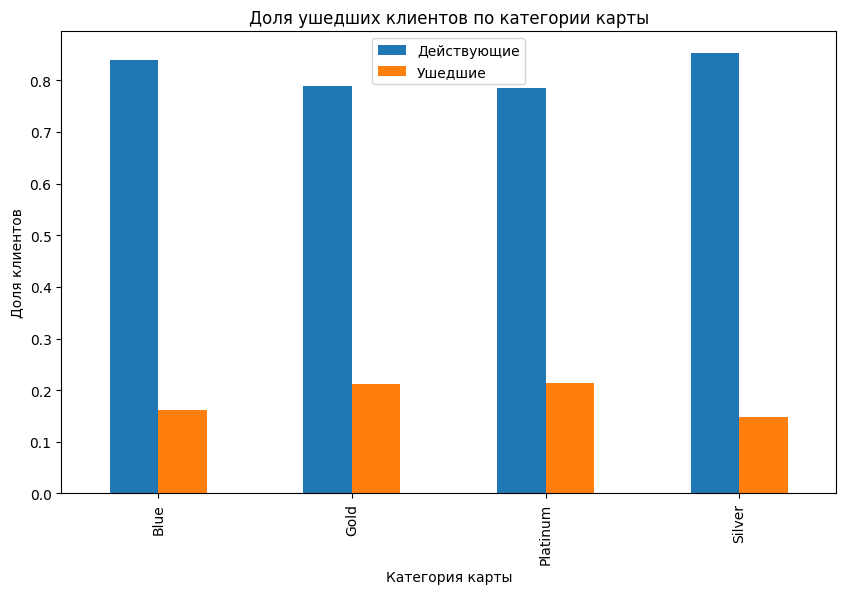

In [545]:
plt.figure(figsize=(10, 6))
card_attrition = pd.crosstab(viz_data['Card_Category'], viz_data['Attrition_Flag'])
card_attrition_percent = card_attrition.div(card_attrition.sum(axis=1), axis=0)
card_attrition_percent.plot(kind='bar', figsize=(10, 6))
plt.title('Доля ушедших клиентов по категории карты')
plt.xlabel('Категория карты')
plt.ylabel('Доля клиентов')
plt.legend(['Действующие', 'Ушедшие'])
plt.show()

Видим что владельцы платиновых карт реже уходят из банка.

#4. Обработать пропущенные значения

In [546]:
print(X_train.isnull().sum())


Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


#5. Обработать категориальные признаки

Разделим на числовые и категориальные признаки

In [547]:

numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"\nЧисловые признаки: {numeric_features}")
print(f"Категориальные признаки: {categorical_features}")


Числовые признаки: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Категориальные признаки: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


Определяем типы категориальных признаков


In [548]:
ordinal_features = ['Card_Category', 'Income_Category']
nominal_features = ['Education_Level', 'Marital_Status', 'Gender']
print("Порядковые признаки :", ordinal_features)
print("Номинальные признаки :", nominal_features)

Порядковые признаки : ['Card_Category', 'Income_Category']
Номинальные признаки : ['Education_Level', 'Marital_Status', 'Gender']


Выведем, чтобы позднее убедиться что значения поменяются

In [549]:
X_train['Card_Category'].head(4)


,Card_Category
8948,Blue
6665,Blue
7119,Blue
2257,Blue


In [550]:
X_train['Income_Category'].head(4)

,Income_Category
8948,Less than $40K
6665,Unknown
7119,$80K - $120K
2257,$40K - $60K


Обработка порядковых признаков.

In [551]:
card_mapping = {'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}
X_train['Card_Category'] = X_train['Card_Category'].map(card_mapping)
X_test['Card_Category'] = X_test['Card_Category'].map(card_mapping)

In [552]:
income_mapping = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}
X_train['Income_Category'] = X_train['Income_Category'].map(income_mapping)
X_test['Income_Category'] = X_test['Income_Category'].map(income_mapping)

In [553]:
X_train['Card_Category'].head(4)


,Card_Category
8948,1
6665,1
7119,1
2257,1


In [554]:
X_train['Income_Category'].head(4)

,Income_Category
8948,1
6665,0
7119,4
2257,2


Видим что порядковые признаки обработали, теперь обработаем номинальные признаки. Будем использовать One-Hot Encoding.

In [555]:
X_train_encoded = pd.get_dummies(X_train, columns=nominal_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=nominal_features, drop_first=True)
X_train_final, X_test_final = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


print("РЕЗУЛЬТАТЫ ONE-HOT ENCODING:")
print(f"• До encoding: {X_train.shape[1]} признаков")
print(f"• После encoding: {X_train_final.shape[1]} признаков")
print(f"• Добавлено: {X_train_final.shape[1] - X_train.shape[1]} новых признаков")
print("✓ One-hot encoding выполнен успешно!")

РЕЗУЛЬТАТЫ ONE-HOT ENCODING:
• До encoding: 19 признаков
• После encoding: 26 признаков
• Добавлено: 7 новых признаков
✓ One-hot encoding выполнен успешно!


In [556]:
print(X_train.dtypes)

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


# 6. НОРМАЛИЗАЦИЯ ДАННЫХ

Проведём нормализацию

In [557]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)
print(f"✓ Размерность обучающей выборки: {X_train_scaled.shape}")
print(f"✓ Размерность тестовой выборки: {X_test_scaled.shape}")


✓ Размерность обучающей выборки: (7088, 26)
✓ Размерность тестовой выборки: (3039, 26)


#7 Обучение моделей

Запустим 2 модели LogisticRegression и RandomForestClassifier и сравним их

In [558]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}
results = {}
print("Обучение моделей:")
for name, model in models.items():
    print(f"  {name}...")
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'model': model
    }

Обучение моделей:
  Random Forest...
  Logistic Regression...


Сравним результаты 2 моделей по параметрам в results.

Accuracy показывает общую долю правильных предсказаний.

Precision насколько мы уверены в предсказании "ушедший".

Recall сколько ушедших клиентов мы нашли.

f1 баланс между точностью и полнотой.

In [559]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
}).sort_values('F1-Score', ascending=False)

print("\nСравнение моделей:")
print(comparison_df.round(4))


Сравнение моделей:
                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest    0.9533     0.9080  0.7889    0.8443
1  Logistic Regression    0.9010     0.7742  0.5410    0.6369


Из сравнения моделей видим что лучшей является Random Forest. По всем показаниям она превосходит другую.

In [560]:
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

Выведим отдельно метрики

In [561]:
y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

print(f"Метрики лучшей модели ({best_model_name}):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_best):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_best):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_best):.4f}")

Метрики лучшей модели (Random Forest):
  Accuracy:  0.9533
  Precision: 0.9080
  Recall:    0.7889
  F1-Score:  0.8443


#8. Ошибки

Матрица рассогласования

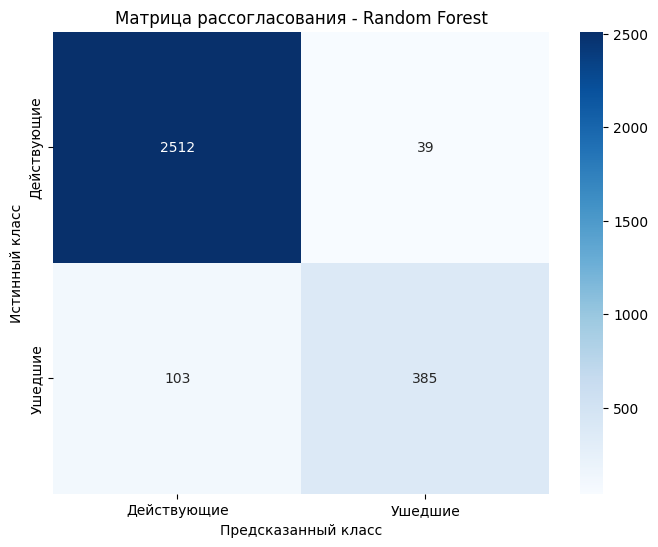

In [562]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Действующие', 'Ушедшие'],
            yticklabels=['Действующие', 'Ушедшие'])
plt.title(f'Матрица рассогласования - {best_model_name}')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()


Отчёт по классификации

In [563]:
print(classification_report(y_test, y_pred_best,
                          target_names=['Действующие клиенты', 'Ушедшие клиенты']))

                     precision    recall  f1-score   support

Действующие клиенты       0.96      0.98      0.97      2551
    Ушедшие клиенты       0.91      0.79      0.84       488

           accuracy                           0.95      3039
          macro avg       0.93      0.89      0.91      3039
       weighted avg       0.95      0.95      0.95      3039



Анализ ошибок предсказания

In [564]:
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]
print(f"  True Negatives (правильно предсказаны действующие): {tn}")
print(f"  False Positives (ошибочно предсказаны как ушедшие): {fp}")
print(f"  False Negatives (пропущенные ушедшие клиенты): {fn}")
print(f"  True Positives (правильно предсказаны ушедшие): {tp}")

print(f"\n  Доля пропущенных ушедших клиентов: {fn/(fn+tp):.2%}")
print(f"  Доля ложных срабатываний: {fp/(fp+tn):.2%}")

  True Negatives (правильно предсказаны действующие): 2512
  False Positives (ошибочно предсказаны как ушедшие): 39
  False Negatives (пропущенные ушедшие клиенты): 103
  True Positives (правильно предсказаны ушедшие): 385

  Доля пропущенных ушедших клиентов: 21.11%
  Доля ложных срабатываний: 1.53%


Модель правильно определяет статус клиента (действующий или ушедший) в 95% случаев.

Для действующих клиентов:

Точность 96% - из предсказанных действующими клиентов 96% действительно остаются с банком

Полнота 98% - модель находит 98% всех реально действующих клиентов

Минимальные ложные срабатывания - всего 1.53% действующих клиентов ошибочно помечены как ушедшие

Для ушедших клиентов:

Высокая точность 91% - когда модель говорит "клиент уйдет", она права в 91% случаев

Хороший баланс - F1-score 0.84 показывает сбалансированность между точностью и полнотой

Пропущенные ушедшие клиенты - модель не обнаруживает 21.11% реально ушедших клиентов (103 человека из 488)

#9. Общие выводы

При работе с данным датасетом удалось выполнить комплексный анализ и построить эффективную модель прогнозирования оттока клиентов банка. Были успешно решены следующие задачи:

Предобработка данных

Аналитическая часть

Моделирование

Провели обработку категориальных признаков, нормализацию. Обучили и сравнили две модели: Logistic Regression и Random Forest, которые показали высокое и схожее качество предсказаний.